In [111]:
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner
import tensorflow as tf

from keras import layers
from keras.metrics import Precision, Recall, F1Score
from keras.utils import to_categorical, pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, LSTM, Bidirectional, Dropout, Conv2D, MaxPooling2D, Input, Embedding, SimpleRNN, BatchNormalization
from keras.regularizers import l2, l1
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam, Adamax, Ftrl
from keras.constraints import max_norm
from keras.datasets import fashion_mnist, imdb
from keras.applications.vgg16 import VGG16

In [112]:
def plot_history(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    val_acc_values = history_dict['val_accuracy']

    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.style.use('dark_background')

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'ro', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(linestyle='--')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['accuracy'], 'ro', label='Training acc')
    plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(linestyle='--')

    plt.tight_layout()
    plt.show()

# Завантаження даних: 

In [113]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [114]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# Створення моделей:

In [115]:
class MyRNNModel():
    def build(self):
        model = Sequential([
            Embedding(max_features, 32),
            SimpleRNN(32, dropout=0.0, recurrent_dropout=0.1),
            BatchNormalization(),
            Flatten(),
            Dense(1, activation='sigmoid', kernel_constraint=max_norm(3.))
        ])

        model.compile(optimizer=RMSprop(),
                      loss='binary_crossentropy',
                      metrics="accuracy")

        return model

In [116]:
class MyLSTMModel():
    def build(self):
        model = Sequential([
            Embedding(max_features, 32),
            LSTM(32, dropout=0.0, recurrent_dropout=0.1),
            BatchNormalization(),
            Flatten(),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer=RMSprop(),
                      loss='binary_crossentropy',
                      metrics="accuracy")

        return model

In [143]:
class MyBRNNModel():
    def build(self):
        model = Sequential([
            Embedding(max_features, 32),
            Bidirectional(LSTM(32, dropout=0.2)),
            # BatchNormalization(),
            Flatten(),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer=RMSprop(),
                      loss='binary_crossentropy',
                      metrics="accuracy")

        return model

In [144]:
class MyDRNNModel():
    def build(self):
        model = Sequential([
            Embedding(max_features, 32),
            LSTM(32, return_sequences=True, dropout=0.0, recurrent_dropout=0.1),
            LSTM(32, recurrent_dropout=0.1),
            # BatchNormalization(),
            Flatten(),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer=RMSprop(),
                      loss='binary_crossentropy',
                      metrics="accuracy")

        return model

In [119]:
class MyDBRNNModel():
    def build(self):
        model = Sequential([
            Embedding(max_features, 32),
            Bidirectional(LSTM(32, return_sequences=True, dropout=0.0)),
            Bidirectional(LSTM(32, dropout=0.0)),
            BatchNormalization(),
            Flatten(),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer=RMSprop(),
                      loss='binary_crossentropy',
                      metrics="accuracy")

        return model

# Тренування та оцінка:

In [120]:
rnnmodel = MyRNNModel()
rnn_model = rnnmodel.build()

history = rnn_model.fit(input_train, y_train, epochs=8, batch_size=128, validation_split=0.25)

Epoch 1/8
147/147 [==============================] - 22s 145ms/step - loss: 0.7247 - accuracy: 0.5659 - val_loss: 0.5304 - val_accuracy: 0.7472
Epoch 2/8
147/147 [==============================] - 21s 144ms/step - loss: 0.5022 - accuracy: 0.7550 - val_loss: 0.6477 - val_accuracy: 0.6667
Epoch 3/8
147/147 [==============================] - 21s 143ms/step - loss: 0.3936 - accuracy: 0.8263 - val_loss: 0.3763 - val_accuracy: 0.8414
Epoch 4/8
147/147 [==============================] - 21s 144ms/step - loss: 0.3393 - accuracy: 0.8573 - val_loss: 0.6935 - val_accuracy: 0.7434
Epoch 5/8
147/147 [==============================] - 21s 144ms/step - loss: 0.3022 - accuracy: 0.8777 - val_loss: 0.7187 - val_accuracy: 0.7442
Epoch 6/8
147/147 [==============================] - 21s 144ms/step - loss: 0.2723 - accuracy: 0.8919 - val_loss: 1.0179 - val_accuracy: 0.7032
Epoch 7/8
147/147 [==============================] - 21s 144ms/step - loss: 0.2380 - accuracy: 0.9075 - val_loss: 0.4150 - val_accuracy:

In [121]:
results = rnn_model.evaluate(input_test, y_test)
print(f"val_accuracy:{results[1]}")

782/782 [==============================] - 9s 11ms/step - loss: 0.4158 - accuracy: 0.8489
val_accuracy:0.8488799929618835


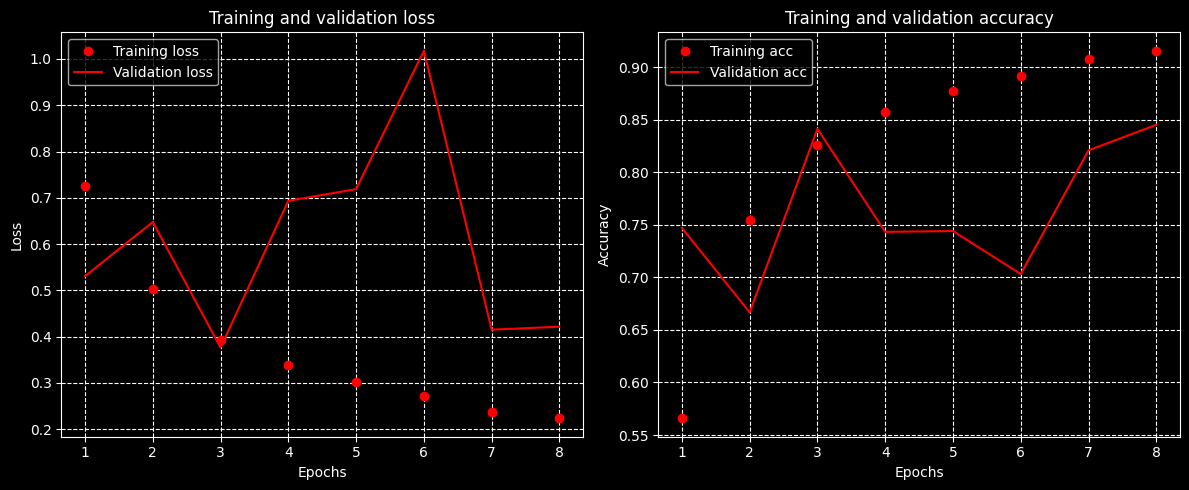

In [122]:
plot_history(history)

In [123]:
lstmmodel = MyLSTMModel()
lstm_model = lstmmodel.build()

history = lstm_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.25)

Epoch 1/5
147/147 [==============================] - 72s 470ms/step - loss: 0.4249 - accuracy: 0.7962 - val_loss: 0.5765 - val_accuracy: 0.7634
Epoch 2/5
147/147 [==============================] - 68s 465ms/step - loss: 0.2505 - accuracy: 0.8979 - val_loss: 0.5270 - val_accuracy: 0.7030
Epoch 3/5
147/147 [==============================] - 67s 456ms/step - loss: 0.1955 - accuracy: 0.9257 - val_loss: 0.3094 - val_accuracy: 0.8669
Epoch 4/5
147/147 [==============================] - 66s 448ms/step - loss: 0.1528 - accuracy: 0.9435 - val_loss: 0.4436 - val_accuracy: 0.8728
Epoch 5/5
147/147 [==============================] - 67s 458ms/step - loss: 0.1229 - accuracy: 0.9553 - val_loss: 0.7201 - val_accuracy: 0.8397


In [124]:
results = lstm_model.evaluate(input_test, y_test)
print(f"val_accuracy:{results[1]}")

782/782 [==============================] - 27s 35ms/step - loss: 0.7672 - accuracy: 0.8270
val_accuracy:0.826960027217865


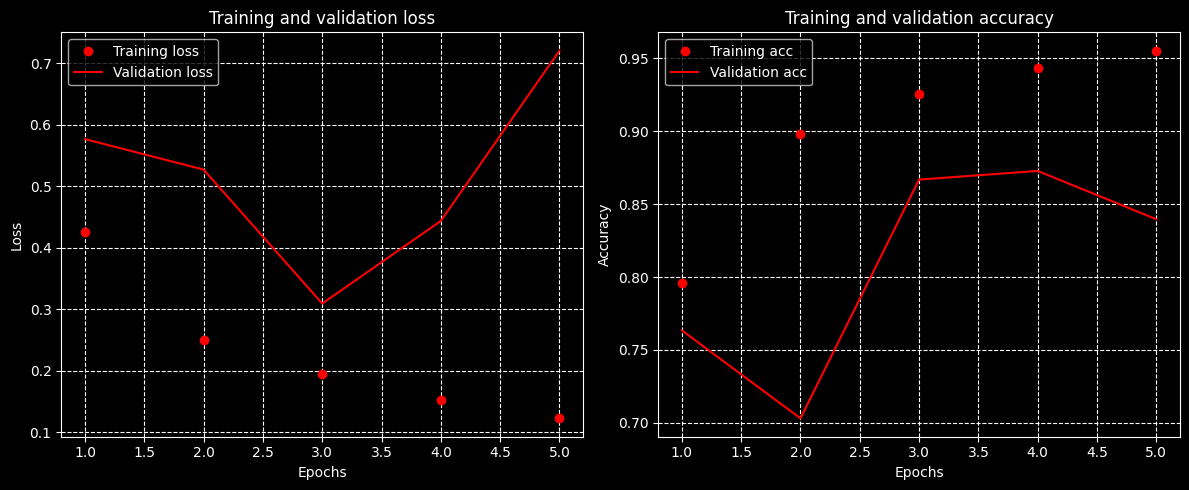

In [125]:
plot_history(history)

In [145]:
brnnmodel = MyBRNNModel()
brnn_model = brnnmodel.build()

history = brnn_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.25)

Epoch 1/5
147/147 [==============================] - 70s 457ms/step - loss: 0.6257 - accuracy: 0.6410 - val_loss: 0.4790 - val_accuracy: 0.7818
Epoch 2/5
147/147 [==============================] - 67s 454ms/step - loss: 0.4051 - accuracy: 0.8291 - val_loss: 0.3577 - val_accuracy: 0.8498
Epoch 3/5
147/147 [==============================] - 67s 459ms/step - loss: 0.3090 - accuracy: 0.8763 - val_loss: 0.3891 - val_accuracy: 0.8270
Epoch 4/5
147/147 [==============================] - 68s 465ms/step - loss: 0.2564 - accuracy: 0.9009 - val_loss: 0.4445 - val_accuracy: 0.7963
Epoch 5/5
147/147 [==============================] - 68s 463ms/step - loss: 0.2254 - accuracy: 0.9159 - val_loss: 0.3046 - val_accuracy: 0.8800


In [146]:
results = brnn_model.evaluate(input_test, y_test)
print(f"val_accuracy:{results[1]}")

782/782 [==============================] - 39s 50ms/step - loss: 0.3219 - accuracy: 0.8736
val_accuracy:0.8735600113868713


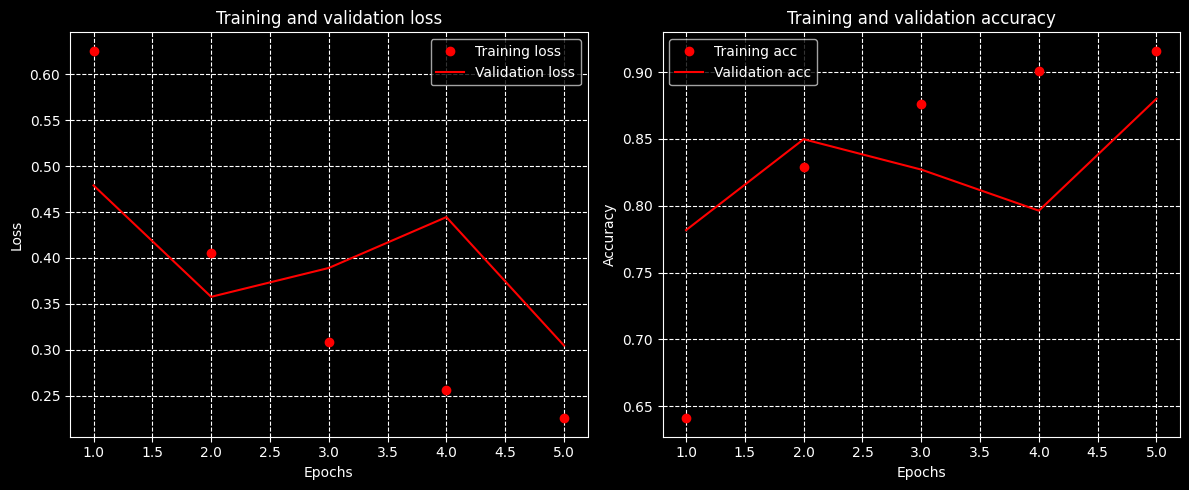

In [147]:
plot_history(history)

In [148]:
drnnmodel = MyDRNNModel()
drnn_model = drnnmodel.build()

history = drnn_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.25)

Epoch 1/5
147/147 [==============================] - 168s 1s/step - loss: 0.6070 - accuracy: 0.6324 - val_loss: 0.4029 - val_accuracy: 0.8307
Epoch 2/5
147/147 [==============================] - 166s 1s/step - loss: 0.3645 - accuracy: 0.8474 - val_loss: 0.3198 - val_accuracy: 0.8691
Epoch 3/5
147/147 [==============================] - 166s 1s/step - loss: 0.2726 - accuracy: 0.8943 - val_loss: 0.3289 - val_accuracy: 0.8646
Epoch 4/5
147/147 [==============================] - 168s 1s/step - loss: 0.2285 - accuracy: 0.9145 - val_loss: 0.2894 - val_accuracy: 0.8795
Epoch 5/5
147/147 [==============================] - 167s 1s/step - loss: 0.1983 - accuracy: 0.9268 - val_loss: 0.3096 - val_accuracy: 0.8896


In [149]:
results = drnn_model.evaluate(input_test, y_test)
print(f"val_accuracy:{results[1]}")

782/782 [==============================] - 86s 110ms/step - loss: 0.3392 - accuracy: 0.8785
val_accuracy:0.8785200119018555


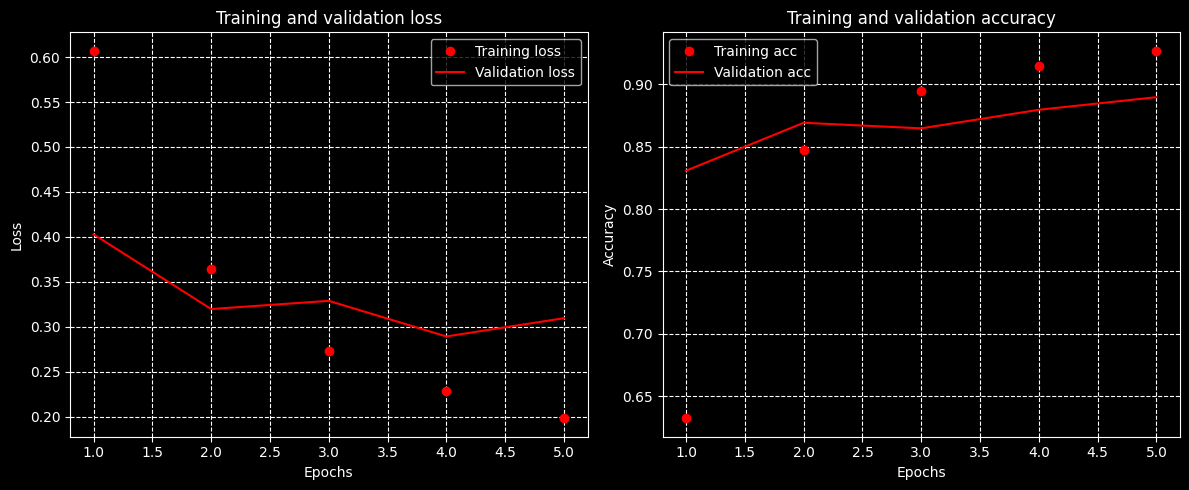

In [150]:
plot_history(history)

In [132]:
dbrnnmodel = MyDBRNNModel()
dbrnn_model =dbrnnmodel.build()

history = dbrnn_model.fit(input_train, y_train, epochs=4, batch_size=128, validation_split=0.25)

Epoch 1/4
147/147 [==============================] - 124s 812ms/step - loss: 0.4196 - accuracy: 0.7984 - val_loss: 0.5831 - val_accuracy: 0.7374
Epoch 2/4
147/147 [==============================] - 120s 820ms/step - loss: 0.2541 - accuracy: 0.8931 - val_loss: 0.4083 - val_accuracy: 0.8219
Epoch 3/4
147/147 [==============================] - 120s 819ms/step - loss: 0.1943 - accuracy: 0.9236 - val_loss: 0.6391 - val_accuracy: 0.7483
Epoch 4/4
147/147 [==============================] - 119s 813ms/step - loss: 0.1549 - accuracy: 0.9429 - val_loss: 0.3659 - val_accuracy: 0.8622


In [133]:
results = dbrnn_model.evaluate(input_test, y_test)
print(f"val_accuracy:{results[1]}")

782/782 [==============================] - 67s 86ms/step - loss: 0.3912 - accuracy: 0.8519
val_accuracy:0.8519200086593628


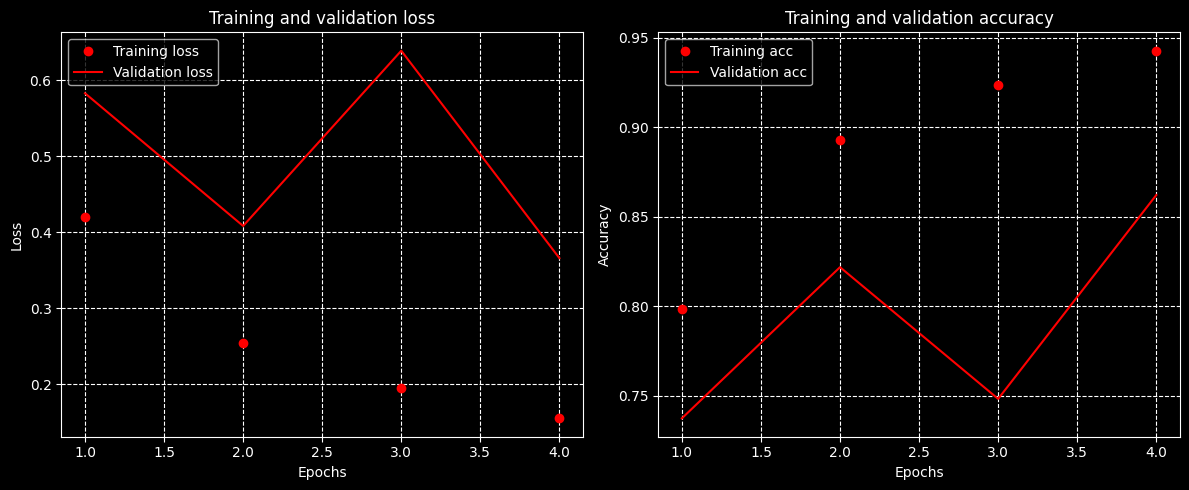

In [134]:
plot_history(history)

# Висновки:

Однозначно можу сказати що на конкретному датасеті великої різниці між моделями я не побачив. Всі моделі швидко перезавчалися. Змінюючи  dropout та recurrent_dropout зміг відтянути перенавчання на кілька епох, але це не принесло значного збільшення точності. Двостороння та глибока моделі чуть краше справились з цим датасетом, але збільшення їх глибени не принесли результату крім збільшення часу навчання в декілька разів.